In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Dataseti yükləmək (faylınızı yerləşdiyi yerə uyğun)** /
**Load dataset(write path to your dataset file)**

In [3]:
df=pd.read_csv("C:\\Users\\ASUS\\Downloads\\PYTHON\\credit_risk_dataset.csv")



**İlkin baxış**/
**Overview**

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [67]:
df.shape

(32581, 12)

In [68]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


**Zid və boş dəyərlərin yoxlanilması**/**Check missing value**

In [5]:
df[(df['person_age']>100) | (df['person_emp_length']>50)]


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [6]:
df.loc[df['person_age'] > 100, 'person_age'] = np.nan   
df.loc[df['person_emp_length'] > 50, 'person_emp_length'] = np.nan

In [7]:
df.isnull().sum()

person_age                       5
person_income                    0
person_home_ownership            0
person_emp_length              897
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<Axes: >

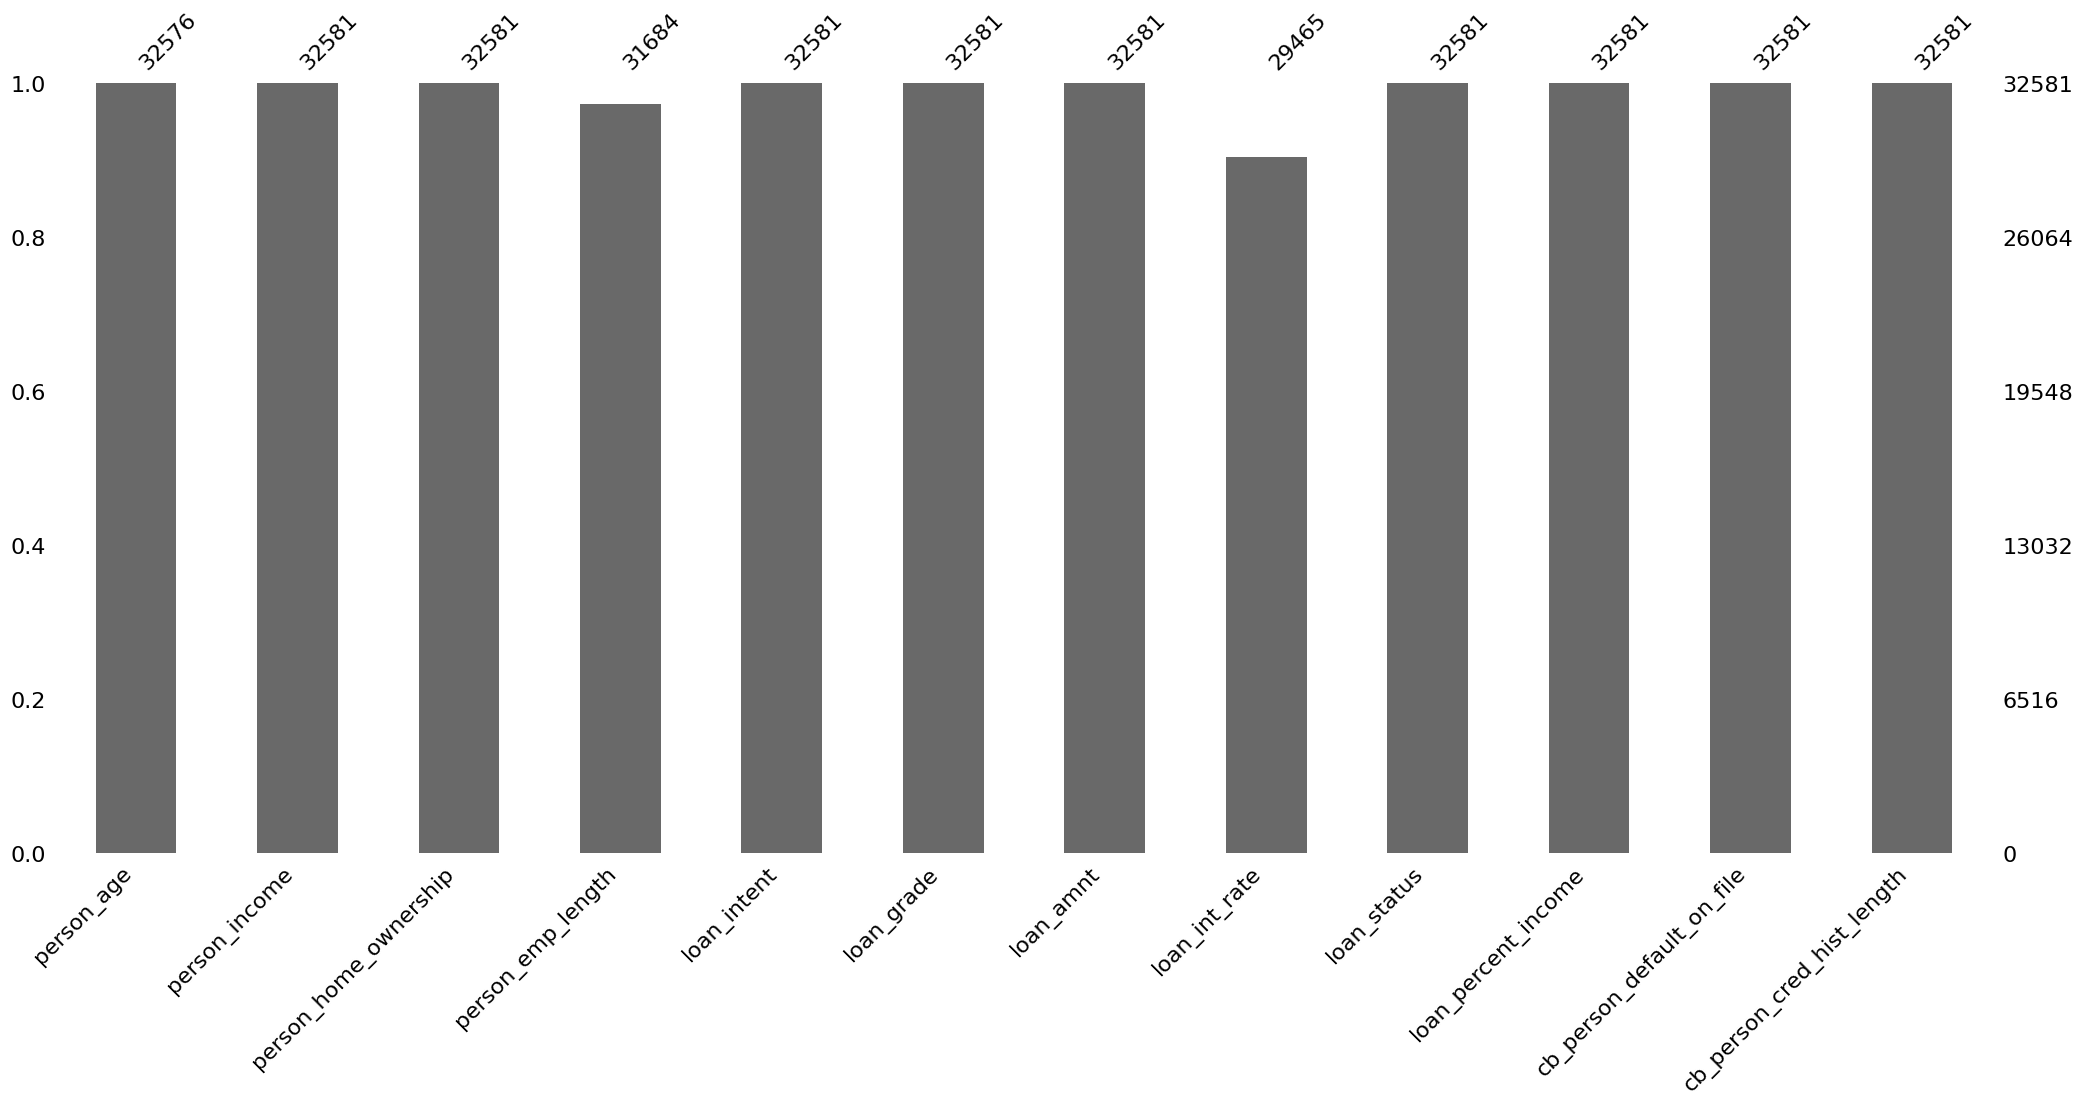

In [8]:
import missingno as msno
msno.bar(df)


İş stajı (person_emp_length) boşluqlarının regressiya(multiple linaer regression )ilə doldurulması/

Regression imputation of employment length missing values


In [9]:
median_age = df['person_age'].median()
df['person_age'] = df['person_age'].fillna(median_age)

In [10]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              897
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [11]:
from sklearn.linear_model import LinearRegression

df_notnan=df['person_emp_length'].notna()
x=df.loc[df_notnan,['person_age','person_income','loan_amnt']]
y=df.loc[df_notnan,'person_emp_length']

model=LinearRegression()
model.fit(x,y)

y_mis=df.loc[~df_notnan,['person_age','person_income','loan_amnt']]
y_pred=model.predict(y_mis)


y_pred1=model.predict(x)


pred=pd.DataFrame({'actual':y,'predicted':y_pred1,'residual':y-y_pred1})
pred



,actual,predicted,residual
1,5.0,3.312218,1.687782
2,1.0,3.941047,-2.941047
3,4.0,5.537415,-1.537415
4,8.0,5.569656,2.430344
5,2.0,3.387792,-1.387792
...,...,...,...
32576,1.0,7.490357,-6.490357
32577,4.0,8.186167,-4.186167
32578,3.0,9.884797,-6.884797
32579,5.0,8.449462,-3.449462


In [12]:
df.loc[~df_notnan, 'person_emp_length'] = y_pred
df.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [13]:
df_notnan_rate=df['loan_int_rate'].notna()
x_rate=df.loc[df_notnan_rate,['person_income','loan_amnt']]
y_rate=df.loc[df_notnan_rate,'loan_int_rate']

model=LinearRegression()
model.fit(x_rate,y_rate)

y_mis_rate=df.loc[~df_notnan_rate,['person_income','loan_amnt']]
y_pred_rate=model.predict(y_mis_rate)

y_pred2=model.predict(x_rate)


pred2=pd.DataFrame({'actual':y_rate,'predicted':y_pred2,'residual':y_rate-y_pred2})
pred2


,actual,predicted,residual
0,16.02,13.087867,2.932133
1,11.14,10.438910,0.701090
2,12.87,10.803798,2.066202
3,15.23,13.073660,2.156340
4,14.27,13.097921,1.172079
...,...,...,...
32576,13.16,10.733263,2.426737
32577,7.49,11.545665,-4.055665
32578,10.99,13.050710,-2.060710
32579,11.48,11.267242,0.212758


In [14]:
df.loc[~df_notnan_rate, 'loan_int_rate'] = y_pred_rate
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

**Vizuallaşdırma \Visualization**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21344\1853323376.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_loan_stats = df.groupby('age_group').agg(


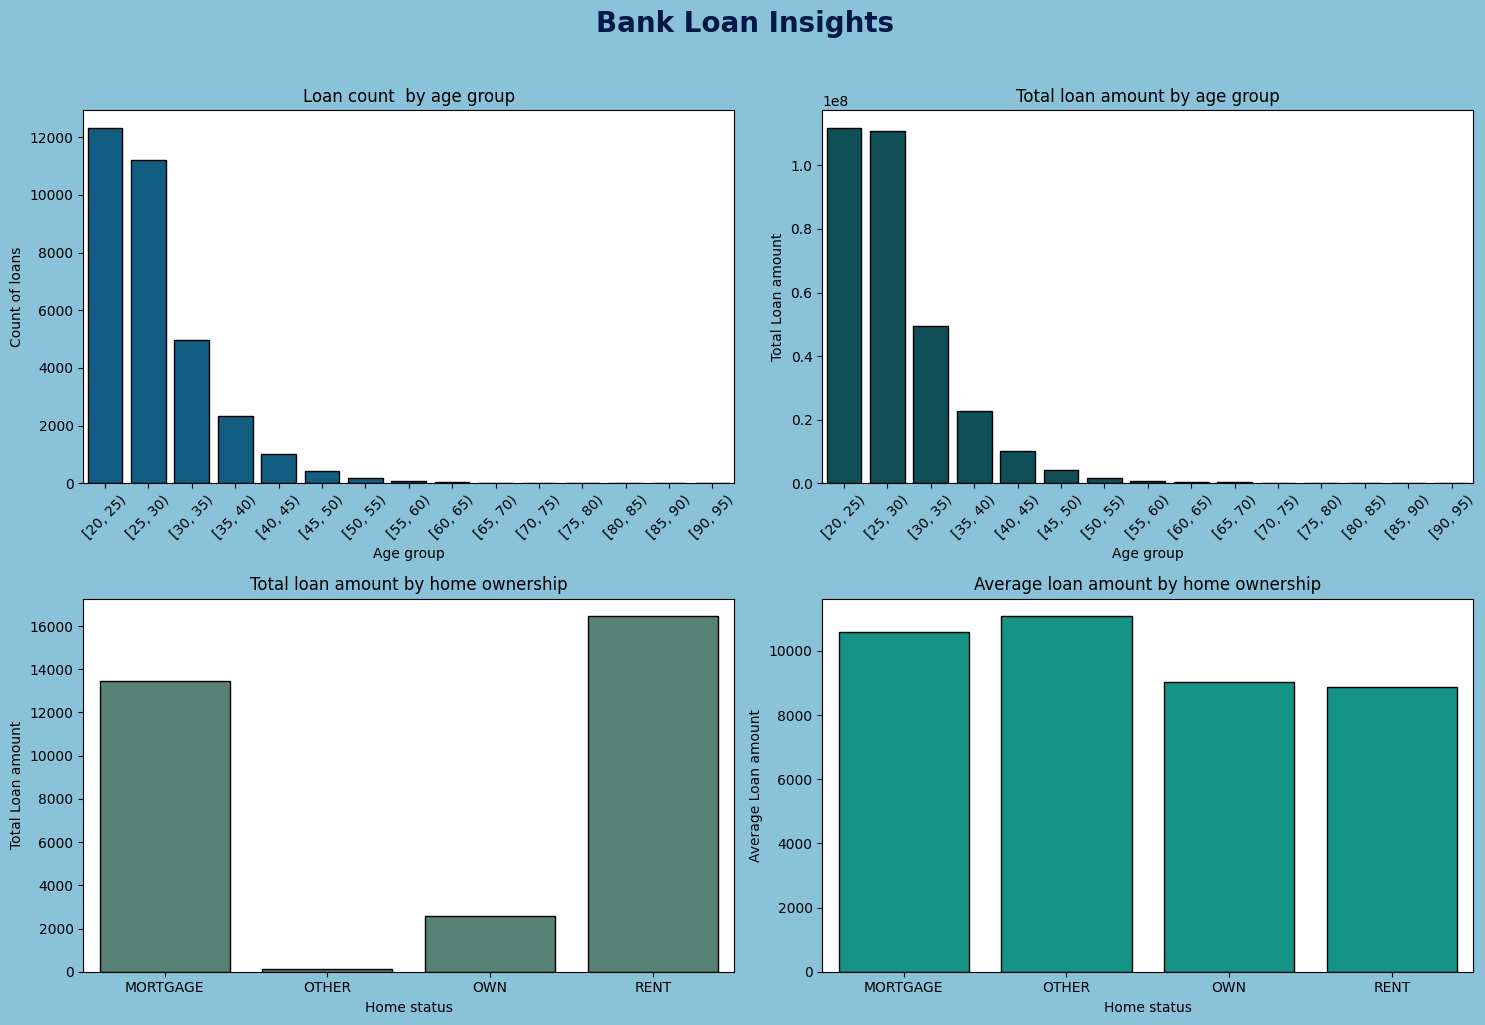

In [15]:
#canva

fig,axs = plt.subplots(2, 2, figsize=(15, 10))
plt.suptitle('Bank Loan Insights', fontsize=20,fontweight='bold',c='#001845' ,y=1.02)
fig.patch.set_facecolor("#89c2d9")


# Visual-1

n = df['person_age'].shape[0]
sturges_bin = int(1 + np.log2(n))


min_age = int(df['person_age'].min())
max_age = int(df['person_age'].max())


bin_width = int(np.ceil((max_age - min_age) / sturges_bin))
bins = list(range(min_age, max_age + bin_width, bin_width))


df['age_group'] = pd.cut(df['person_age'], bins=bins, right=False)


age_loan_stats = df.groupby('age_group').agg(
    loan_count=('loan_amnt', 'count'),
    loan_sum=('loan_amnt', 'sum')
).reset_index()

sns.barplot(x=age_loan_stats['age_group'].astype(str),
y=age_loan_stats['loan_count'],
ax=axs[0, 0],
color='#006494',
edgecolor='black')


axs[0, 0].set_title('Loan count  by age group')
axs[0, 0].set_xlabel('Age group')
axs[0, 0].set_ylabel('Count of loans')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(False)


#Visual-2

sns.barplot(x=age_loan_stats['age_group'].astype(str),
y=age_loan_stats['loan_sum'],
ax=axs[0, 1],
color='#055864',
edgecolor='black')


axs[0, 1].set_title('Total loan amount by age group')
axs[0, 1].set_xlabel('Age group')
axs[0, 1].set_ylabel('Total Loan amount')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(False)



#Visual-3

home_stats = df.groupby('person_home_ownership').agg(
    loan_count=('loan_amnt', 'count'),
    loan_mean=('loan_amnt', 'mean'),
    income_mean=('person_income', 'mean')
).reset_index()


sns.barplot(x=home_stats['person_home_ownership'].astype(str),
y=home_stats['loan_count'],
ax=axs[1, 0],
color='#508876',
edgecolor='black')


axs[1, 0].set_title('Total loan amount by home ownership')
axs[1, 0].set_xlabel('Home status')
axs[1, 0].set_ylabel('Total Loan amount')
axs[1, 0].grid(False)



#Visual-4

sns.barplot(x=home_stats['person_home_ownership'].astype(str),
y=home_stats['loan_mean'],
ax=axs[1, 1],
color='#00a896',
edgecolor='black')


axs[1, 1].set_title('Average loan amount by home ownership')
axs[1, 1].set_xlabel('Home status')
axs[1, 1].set_ylabel('Average Loan amount')
axs[1, 1].grid(False)



plt.tight_layout()
plt.show()



C:\Users\ASUS\AppData\Local\Temp\ipykernel_21344\2517149122.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['income_group'] = pd.cut(df_filtered['person_income'], bins=bins)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21344\2517149122.py:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_filtered.groupby('income_group').agg(


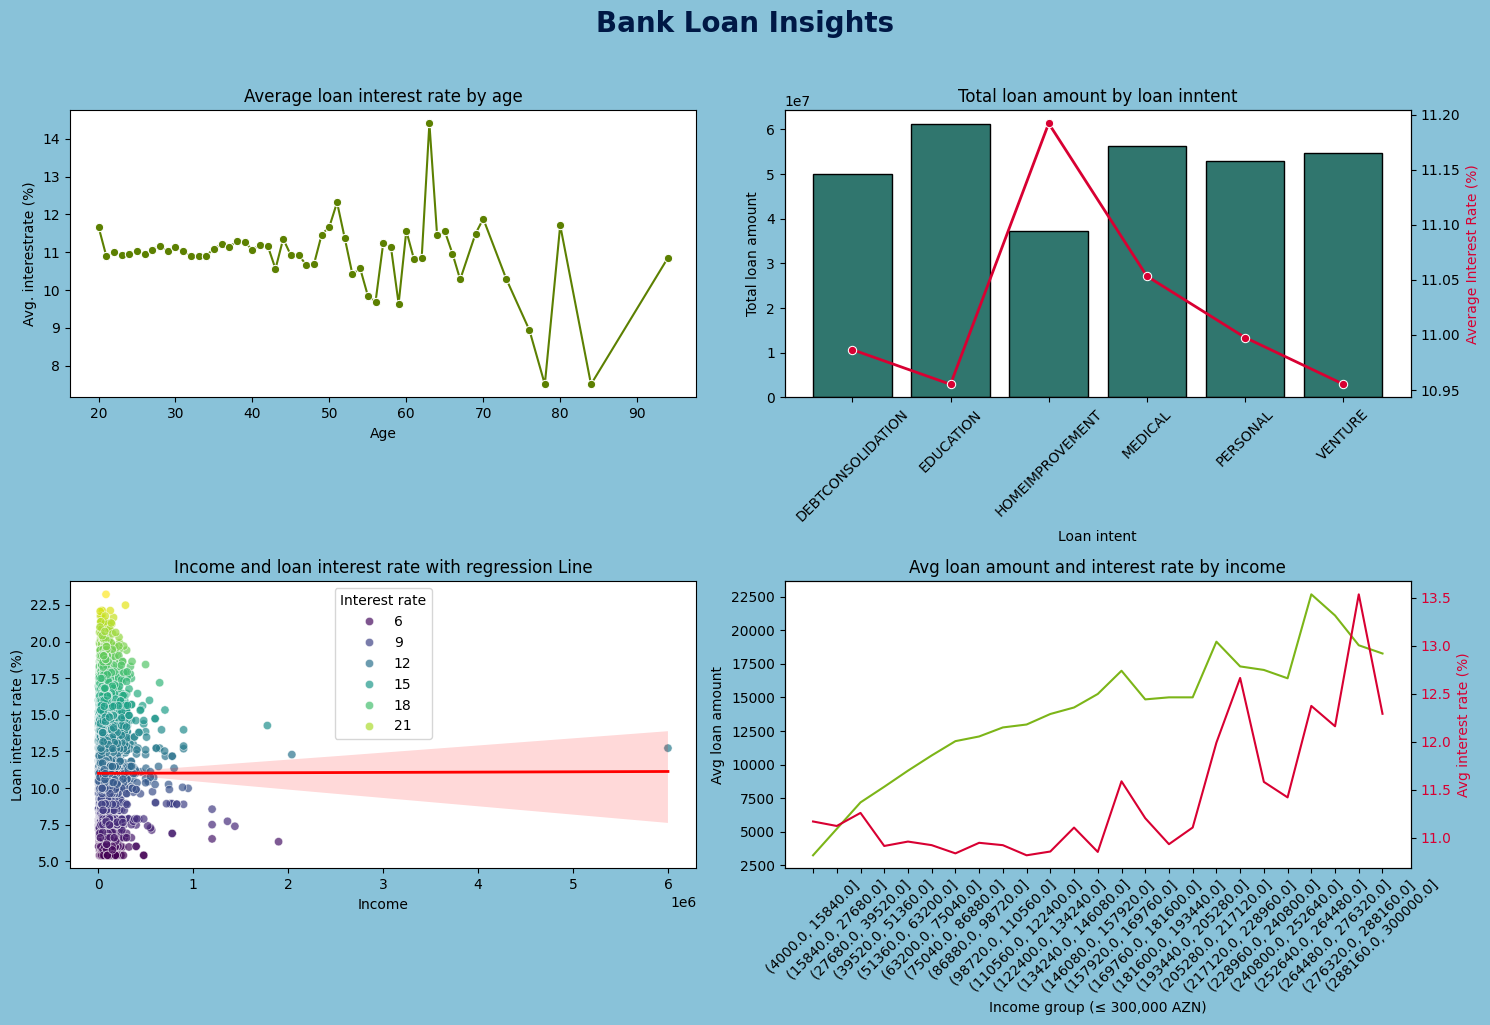

In [50]:
#canva

fig,axs = plt.subplots(2, 2, figsize=(15, 10))
plt.suptitle('Bank Loan Insights', fontsize=20,fontweight='bold',c='#001845' ,y=1.02)
fig.patch.set_facecolor("#89c2d9")



#Visual-1

age_rate = df.groupby('person_age')['loan_int_rate'].mean().reset_index()


sns.lineplot(data=age_rate, x='person_age', y='loan_int_rate', ax=axs[0, 0], color='#5c8001', marker='o')

axs[0, 0].set_title('Average loan interest rate by age')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Avg. interestrate (%)')


#Visual-2


loan_stats = df.groupby('loan_intent').agg(
total_loan_amount=('loan_amnt', 'sum'),
avg_interest_rate=('loan_int_rate', 'mean')
).reset_index()




sns.barplot(x='loan_intent', y='total_loan_amount', data=loan_stats,ax=axs[0,1], color='#248277', edgecolor='black')
axs[0,1].set_title('Total loan amount by loan inntent')
axs[0,1].set_xlabel('Loan intent')
axs[0,1].set_ylabel('Total loan amount')
axs[0,1].tick_params(axis='x', rotation=45)
axs[0,1].grid(False)


ax2 = axs[0,1].twinx()
sns.lineplot(x='loan_intent', y='avg_interest_rate', data=loan_stats,ax=ax2, color='#d80032', marker='o', linewidth=2)
ax2.set_ylabel('Average Interest Rate (%)', color='#d80032')


#Visual-3


sns.scatterplot(
x='person_income',
y='loan_int_rate',
hue='loan_int_rate',
palette='viridis',
data=df,
alpha=0.7,
ax=axs[1, 0])

sns.regplot(
x='person_income',
y='loan_int_rate',
data=df,
scatter=False,
color='red',
line_kws={'linewidth': 2},
ax=axs[1, 0]
)

axs[1, 0].set_title('Income and loan interest rate with regression Line')
axs[1, 0].set_xlabel('Income')
axs[1, 0].set_ylabel('Loan interest rate (%)')
axs[1, 0].legend(title='Interest rate')



#Visual-4


df_filtered = df[df['person_income'] <= 300_000]

bins = np.linspace(df_filtered['person_income'].min(), df_filtered['person_income'].max(), 26)
df_filtered['income_group'] = pd.cut(df_filtered['person_income'], bins=bins)


grouped = df_filtered.groupby('income_group').agg(
 loan_amnt=('loan_amnt', 'mean'),
 loan_int_rate=('loan_int_rate', 'mean')).reset_index()



ax1 = axs[1, 1]
positions = range(len(grouped))


ln1 = ax1.plot(positions, grouped['loan_amnt'], color='#7cb518', label='Avg Loan Amount')
ax1.set_xlabel('Income group (≤ 300,000 AZN)')
ax1.set_ylabel('Avg loan amount', color='Black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(ticks=positions)
ax1.set_xticklabels(grouped['income_group'].astype(str), rotation=45)



ax2 = ax1.twinx()
ln2 = ax2.plot(positions, grouped['loan_int_rate'], color='#d80032', label='Avg interest rate')
ax2.set_ylabel('Avg interest rate (%)', color='#d80032')
ax2.tick_params(axis='y', labelcolor='#d80032')

ax1.set_title('Avg loan amount and interest rate by income')


plt.tight_layout()
plt.show()